<a href="https://colab.research.google.com/github/MinhKhoiMap/predict_cali_house_val/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url = "https://drive.google.com/file/d/1mN31y4UOcWEogVNKuXFvQnkEvsf2Aix7/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df2 = df.drop(['longitude', 'latitude'], axis=1)

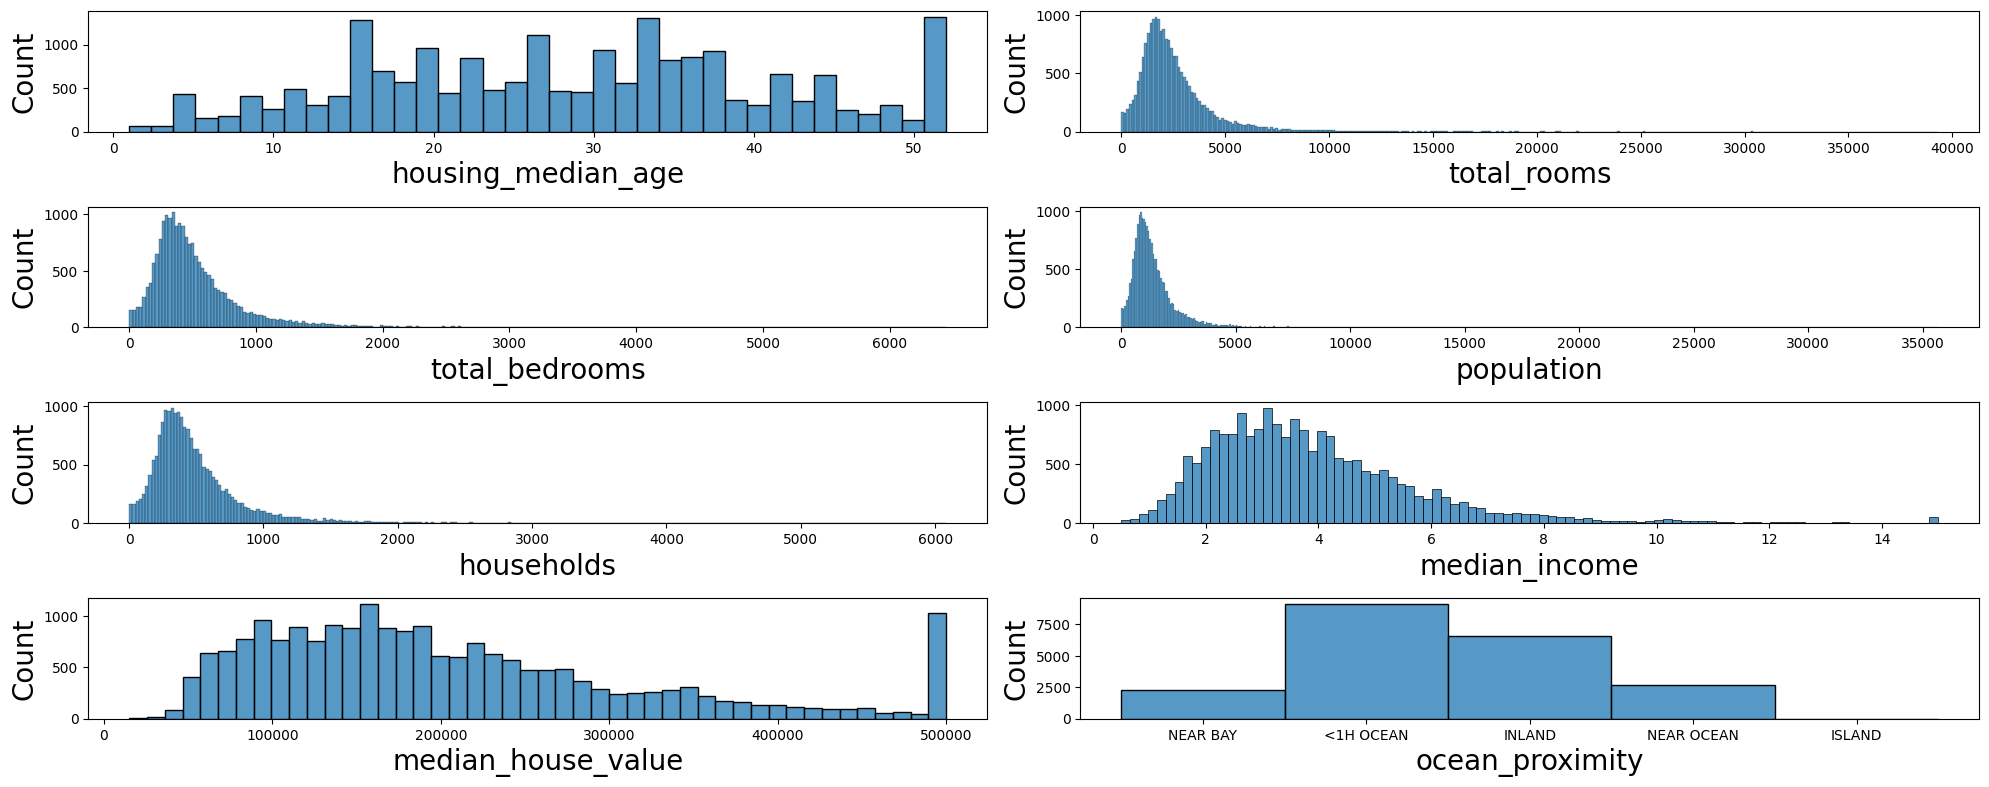

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df2:
    if plotnumber<=26:
        ax=plt.subplot(13,2,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df.ocean_proximity=df.ocean_proximity.map({'NEAR BAY':0,'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'ISLAND':4})


<Figure size 1000x700 with 0 Axes>

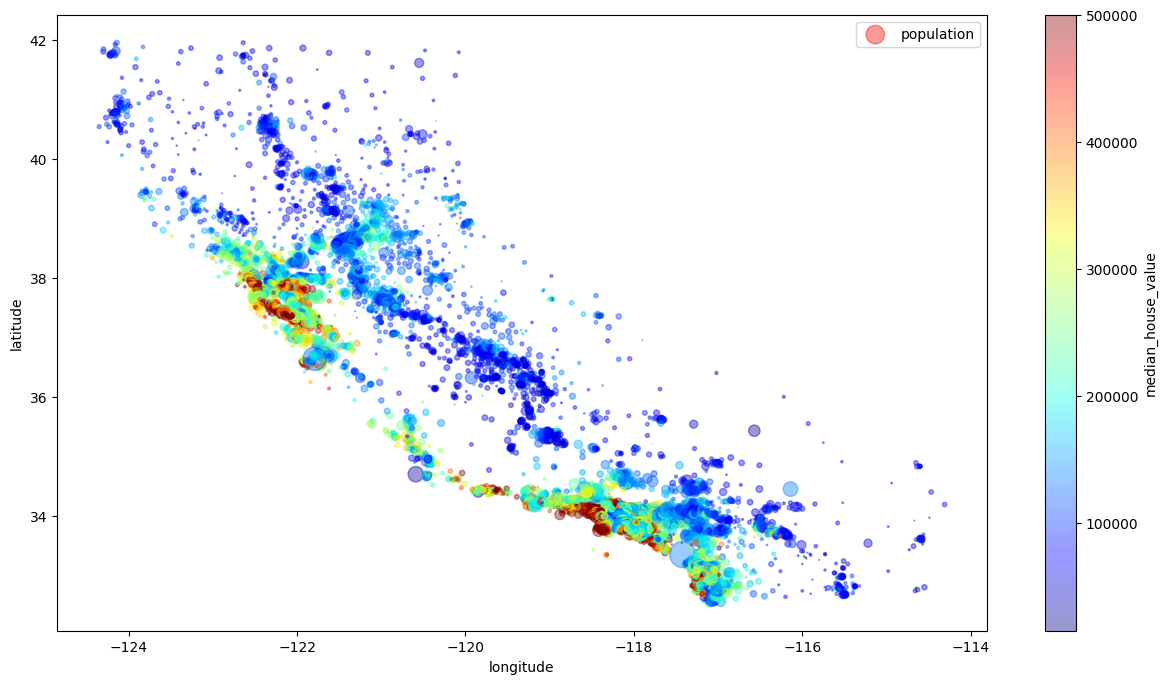

In [ ]:
plt.figure(figsize=(10,7));
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

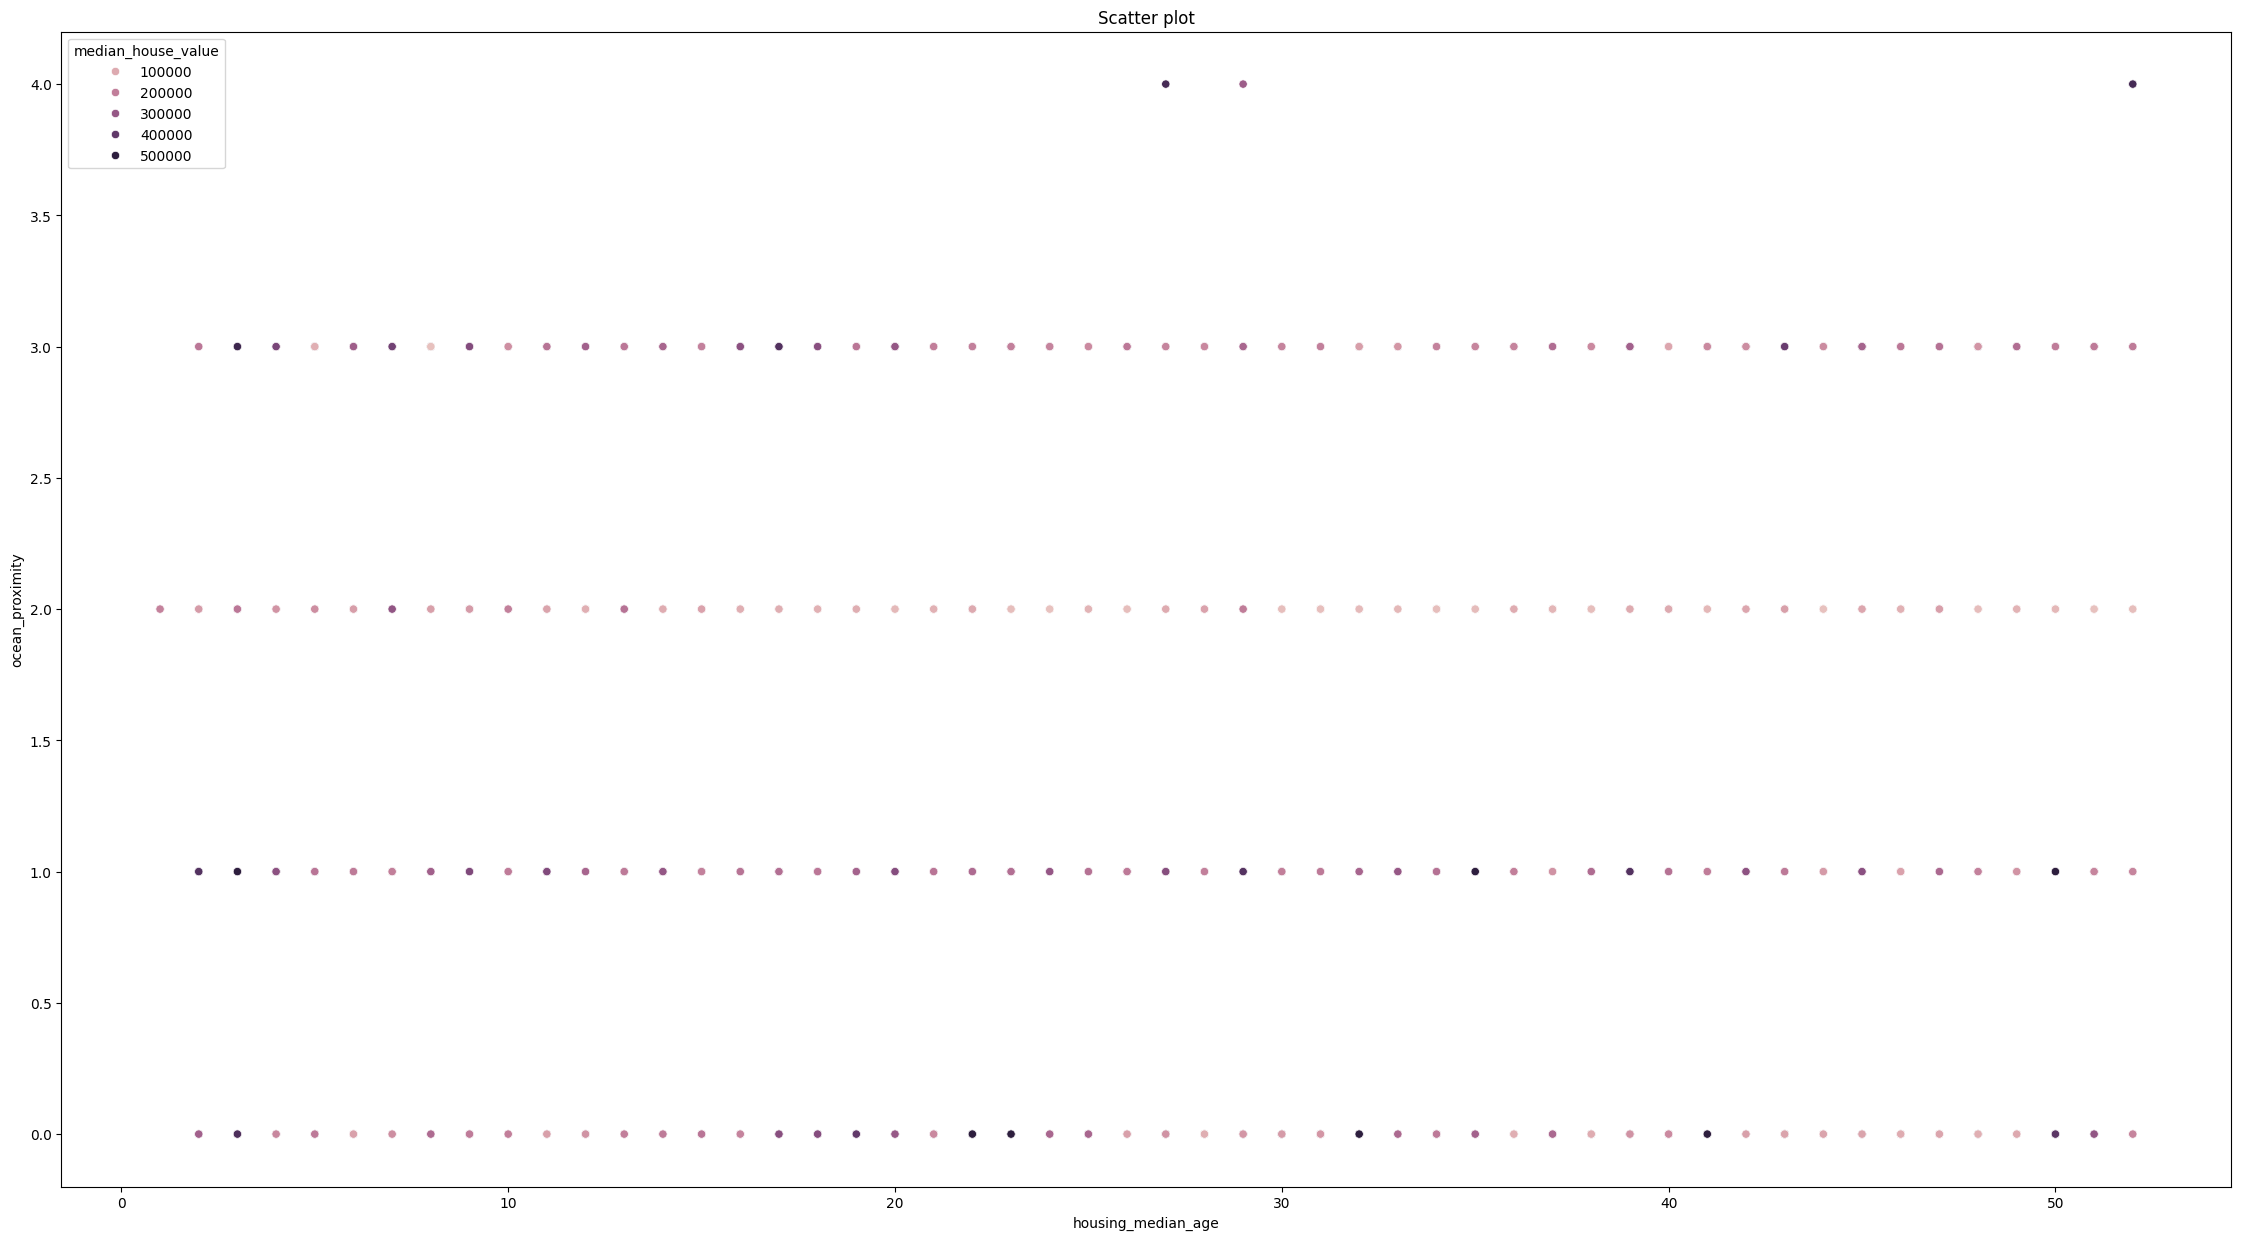

In [ ]:
plt.figure(figsize=(28, 15))
sns.scatterplot(x='housing_median_age', y='ocean_proximity', data=df, hue='median_house_value')
plt.title('Scatter plot')
plt.show()

<Axes: >

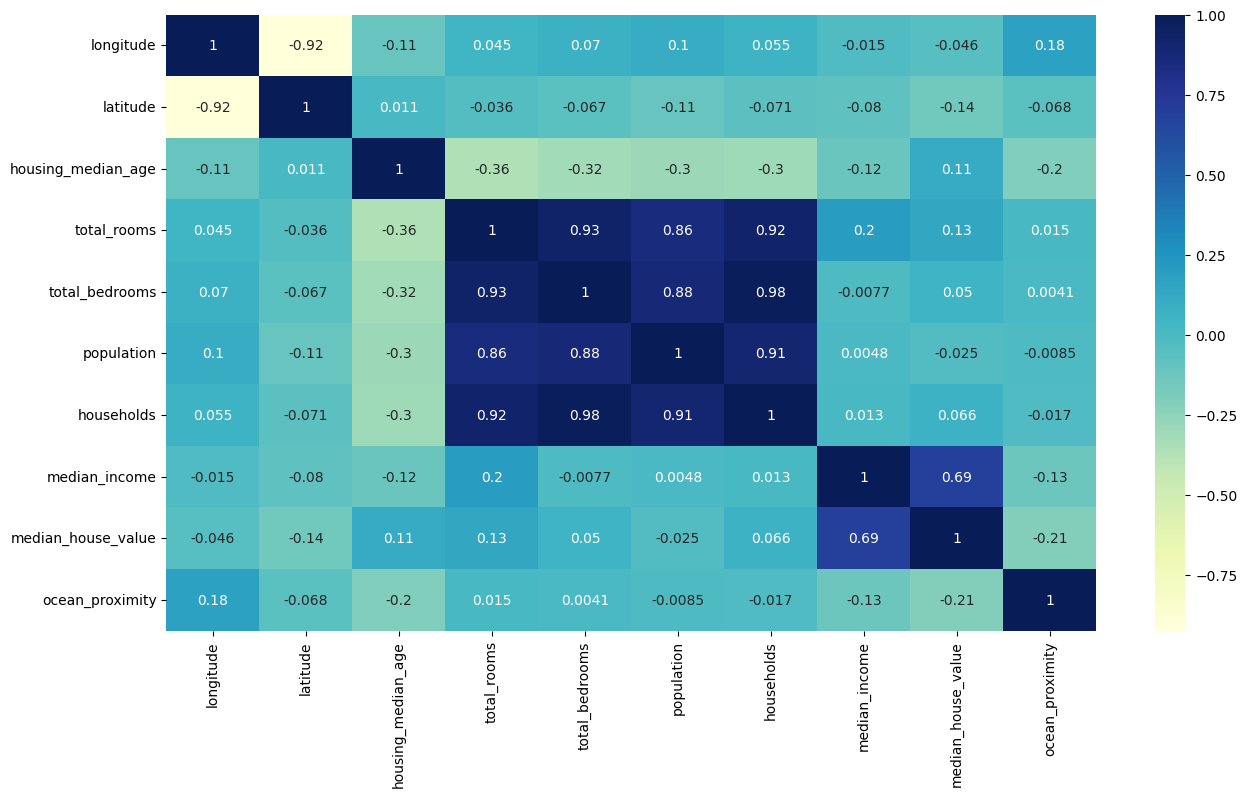

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

In [ ]:
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 39.6 MB/s eta 0:00:00


In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
# defining a simple plot function, input list containing features of names found in dataframe
def plotTwo(df,lst):

    # load california from module, common for all plots
    cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    cali = cali.assign(area=cali.geometry.area)

    # Create a geopandas geometry feature; input dataframe should contain .longtitude, .latitude
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
    proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944) # related to view

    ii=-1
    fig,ax = plt.subplots(1,2,figsize=(21,6),subplot_kw={'projection': proj})
    for i in lst:

        ii+=1
        tgdf = gdf.sort_values(by=i,ascending=True)
        gplt.polyplot(cali,projection=proj,ax=ax[ii]) # the module already has california
        gplt.pointplot(tgdf,ax=ax[ii],hue=i,cmap='plasma',legend=True,alpha=1.0,s=3) #
        ax[ii].set_title(i)

    plt.tight_layout()
    plt.subplots_adjust(wspace=-0.5)

<ipython-input-12-ebad803b4826>:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)
<ipython-input-12-ebad803b4826>:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)


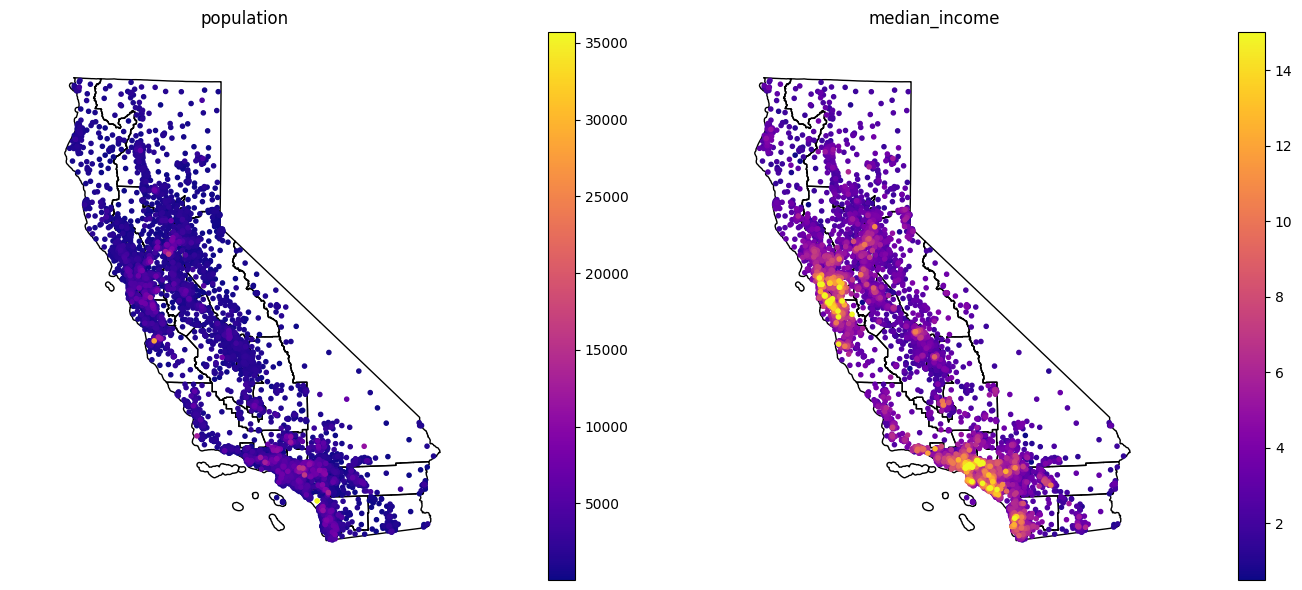

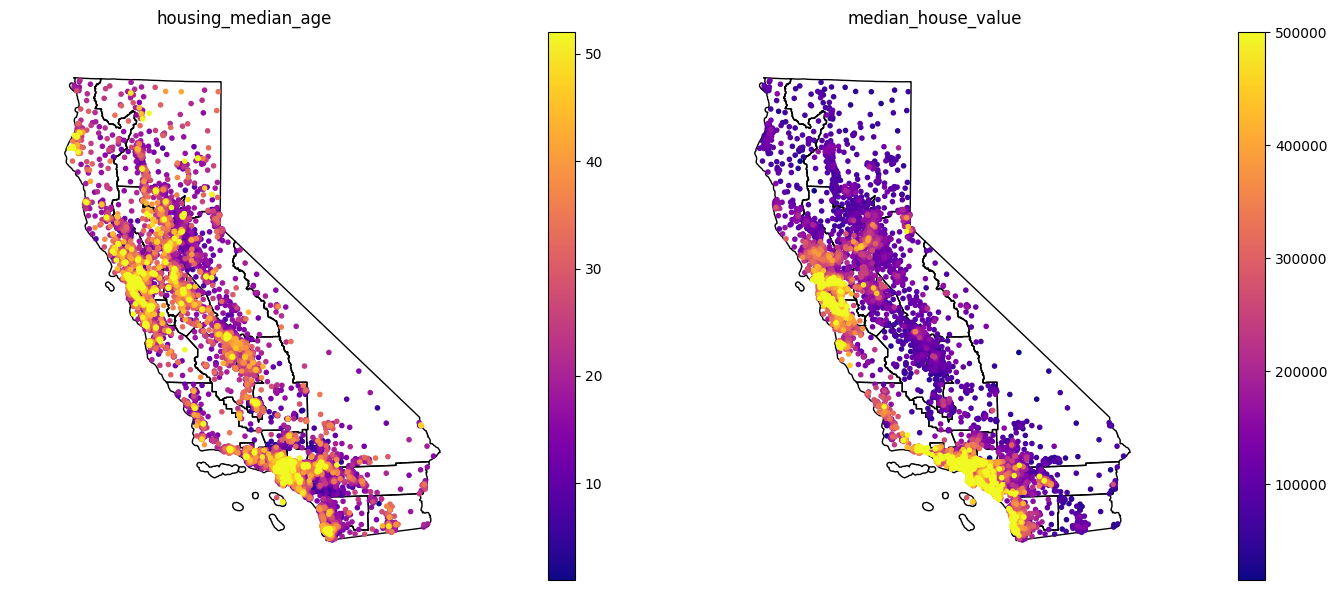

In [ ]:
plotTwo(df,['population','median_income'])
plotTwo(df,['housing_median_age','median_house_value'])


In [ ]:
import io
import urllib.request
from PIL import Image
import matplotlib.image as mpimg

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

with urllib.request.urlopen(url) as url_request:
    image_data = url_request.read()

image_data = io.BytesIO(image_data)
california_img = mpimg.imread(image_data, format='png')

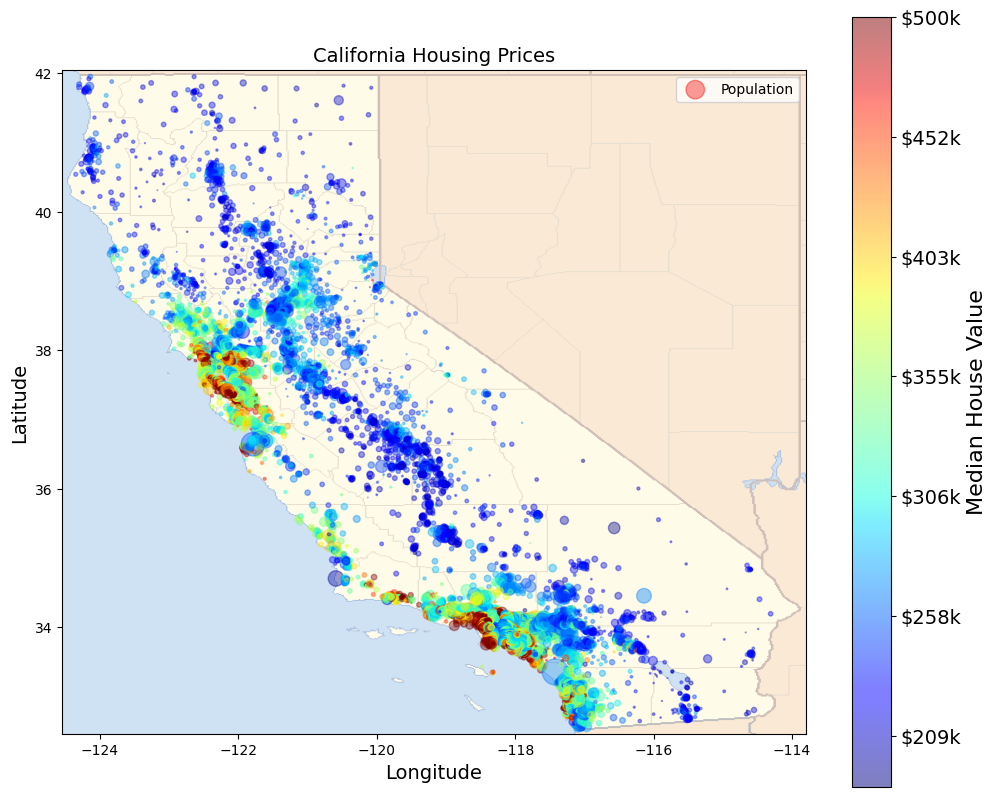

In [ ]:
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,10),
                  s=df['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.title("California Housing Prices", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.show()

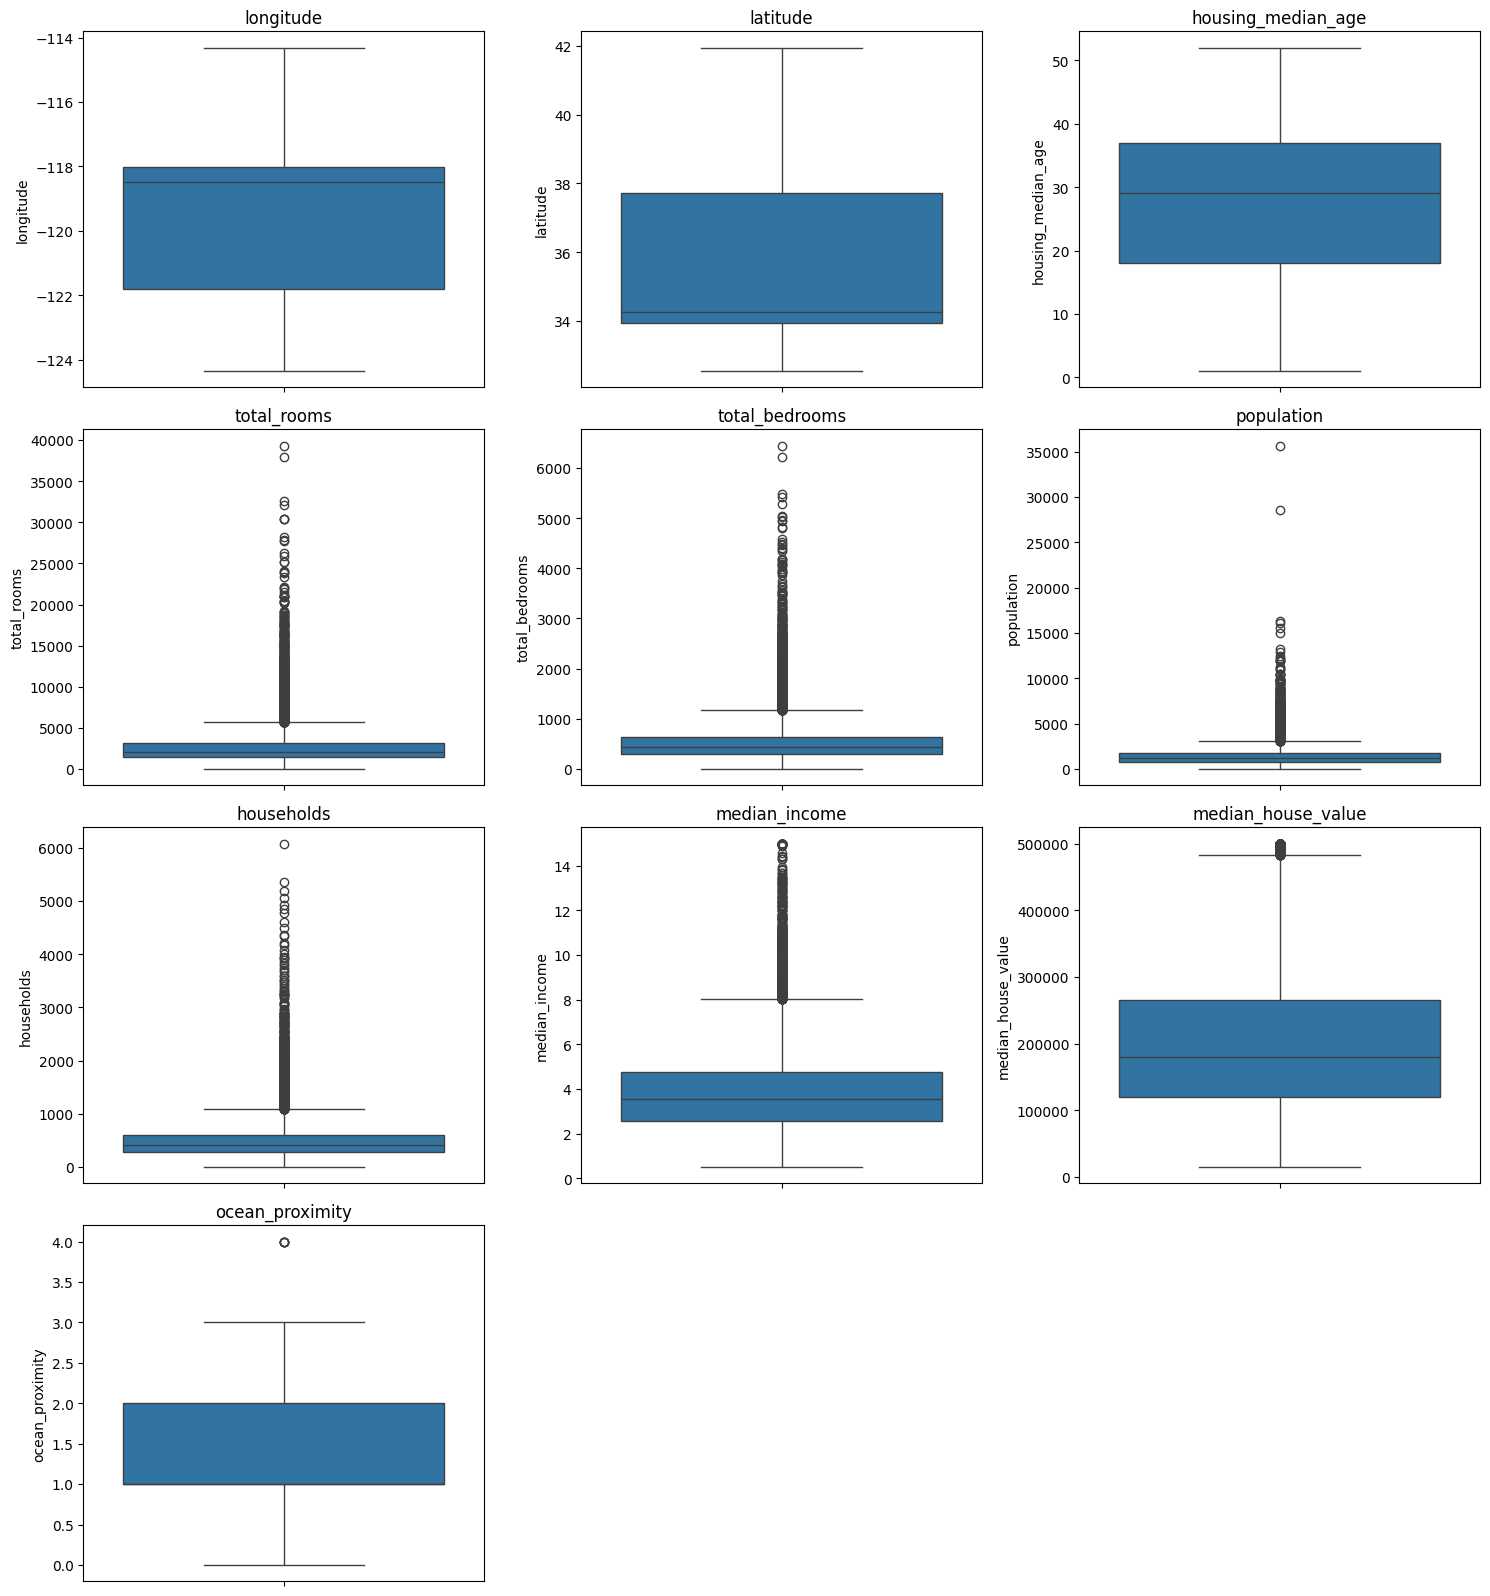

In [ ]:
plt.figure(figsize=(15,20), facecolor='white')

plotnumber = 1


for column in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

# **Preprocessing**

In [ ]:
def replace_outliers(df, threshold=1.5):
    df_cleaned = df.copy()
    for column in df_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        median = df_cleaned[column].median()
        df_cleaned[column] = np.where((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound), median, df_cleaned[column])
    return df_cleaned


df = replace_outliers(df)

In [ ]:
df.to_csv('file2.csv',index=False)

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

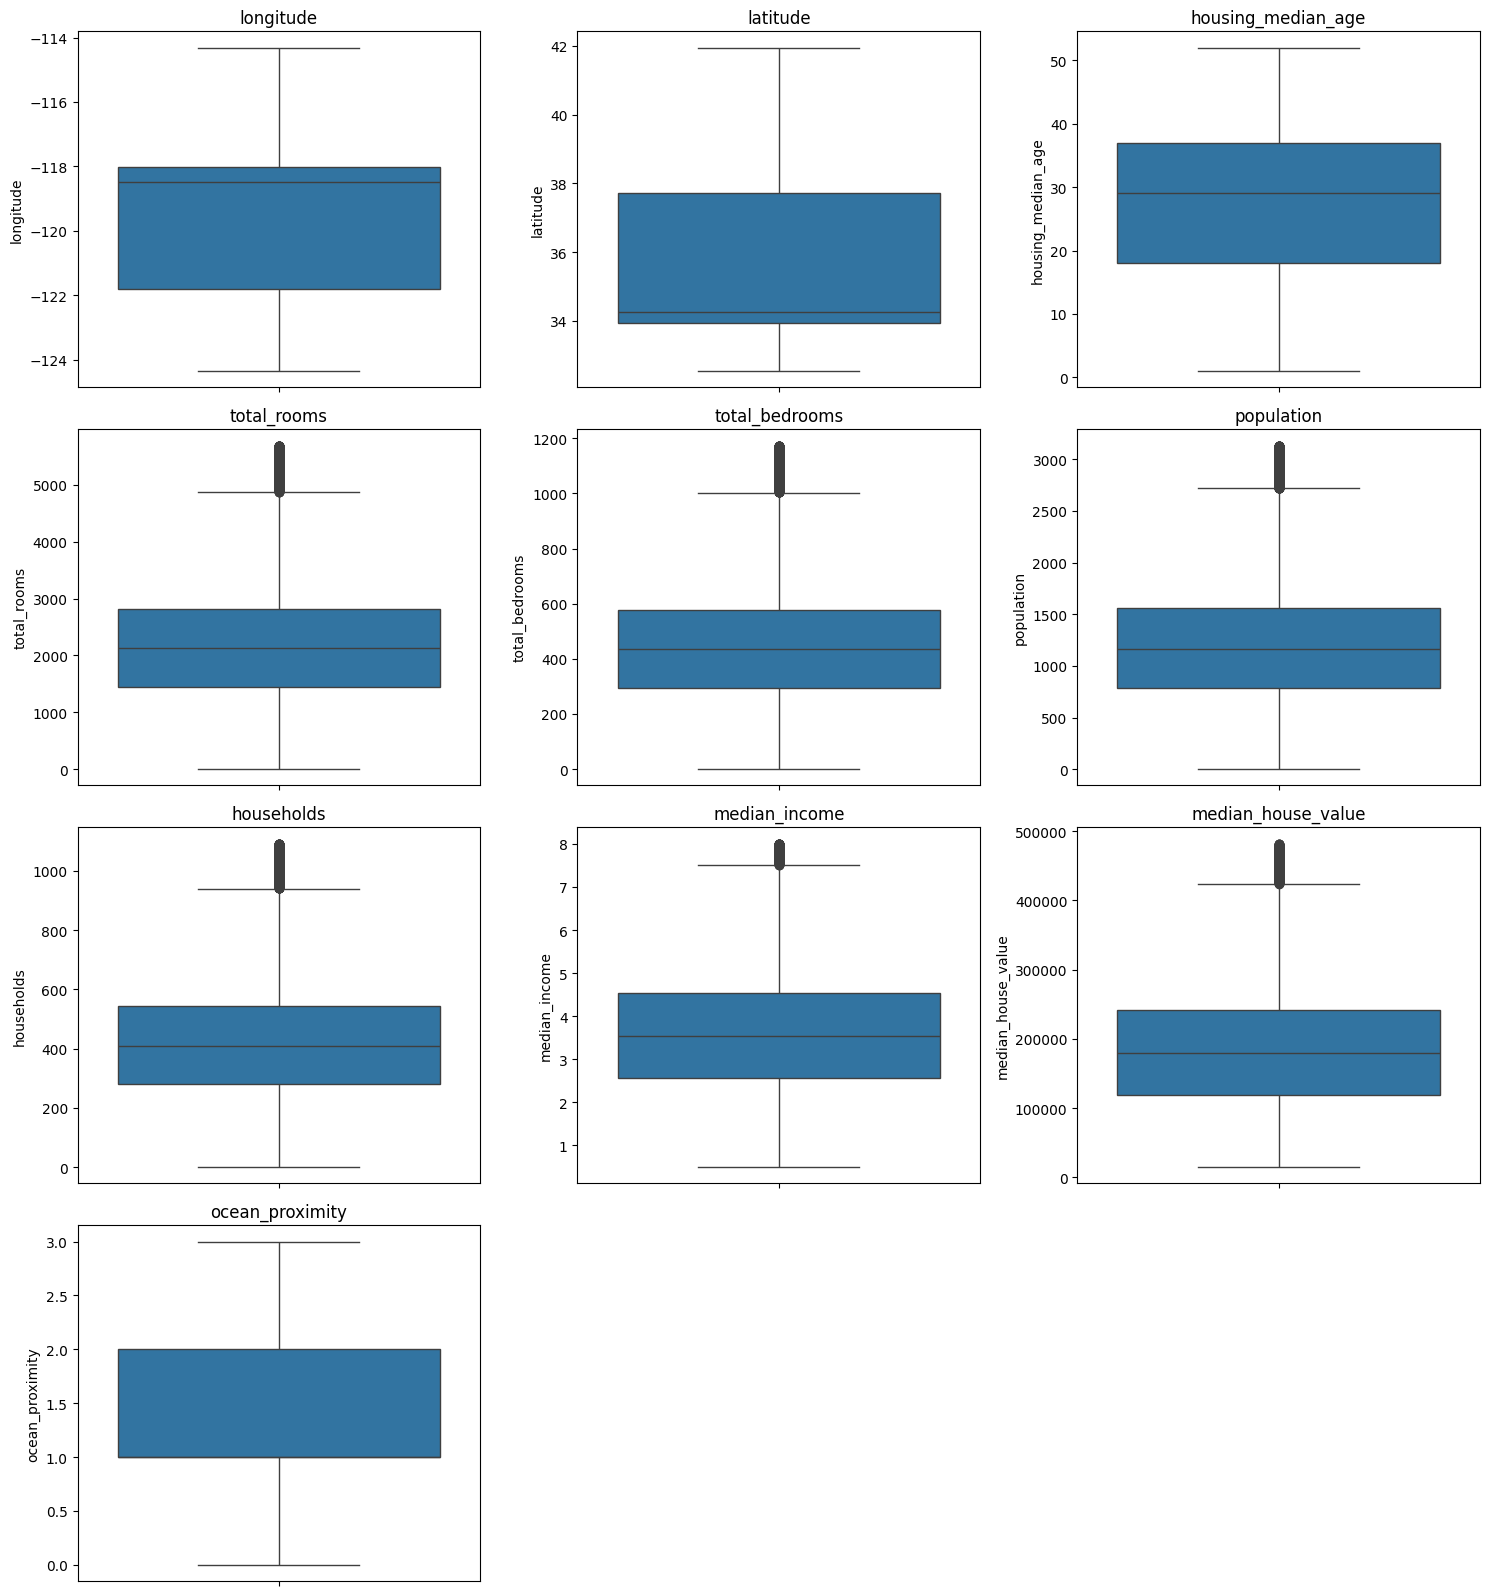

In [ ]:
plt.figure(figsize=(15,20), facecolor='white')

plotnumber = 1


for column in df.columns:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']]=scaler.fit_transform(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']])


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.154252,0.109215,0.101950,0.114574,0.404039,0.936644,0.0
1,0.212151,0.565356,0.392157,0.373331,0.942833,0.766379,0.373969,0.404039,0.735232,0.0
2,0.210159,0.564293,1.000000,0.257379,0.161263,0.157558,0.161320,0.899633,0.721533,0.0
3,0.209163,0.564293,1.000000,0.223472,0.199659,0.177373,0.199817,0.684719,0.698417,0.0
4,0.209163,0.564293,1.000000,0.285488,0.238055,0.179610,0.236480,0.445496,0.700343,0.0
...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.292164,0.318259,0.269096,0.301558,0.141172,0.135062,2.0
20636,0.312749,0.738576,0.333333,0.122101,0.127133,0.112816,0.103575,0.273837,0.132921,2.0
20637,0.311753,0.732200,0.313725,0.395643,0.412969,0.320869,0.395967,0.159770,0.165456,2.0
20638,0.301793,0.732200,0.333333,0.326423,0.348123,0.235858,0.318973,0.182030,0.149188,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [ ]:
df['total_bedrooms']=pd.to_numeric(df['total_bedrooms'])
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.to_csv('file3.csv',index=False)

In [ ]:
df.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="median_house_value", axis = 1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Training Model

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

def TrainModel(model, X_train, y_train, X_test):
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  return y_pred

res = pd.DataFrame(columns = ["MSE", "RMSE", "Execution Time"])

models = {
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(algorithm='brute', weights='distance'),
    "RandomForestRegressor": RandomForestRegressor(max_features='sqrt', min_samples_leaf=2),
}

for name, model in models.items():
  start_time = time.time()
  y_pred = TrainModel(model, X_train, y_train, X_test)
  end_time = time.time()
  executionTime = f'{end_time - start_time} seconds'

  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  res.loc[name] = [MSE, RMSE, executionTime]

display(res)

,MSE,RMSE,Execution Time
SVR,0.017354,0.131735,19.13954210281372 seconds
KNeighborsRegressor,0.017645,0.132836,0.796142578125 seconds
RandomForestRegressor,0.012895,0.113558,7.098415851593018 seconds


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.154252,0.109215,0.101950,0.114574,0.404039,0.936644,0.0
1,0.212151,0.565356,0.392157,0.373331,0.942833,0.766379,0.373969,0.404039,0.735232,0.0
2,0.210159,0.564293,1.000000,0.257379,0.161263,0.157558,0.161320,0.899633,0.721533,0.0
3,0.209163,0.564293,1.000000,0.223472,0.199659,0.177373,0.199817,0.684719,0.698417,0.0
4,0.209163,0.564293,1.000000,0.285488,0.238055,0.179610,0.236480,0.445496,0.700343,0.0
...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.292164,0.318259,0.269096,0.301558,0.141172,0.135062,2.0
20636,0.312749,0.738576,0.333333,0.122101,0.127133,0.112816,0.103575,0.273837,0.132921,2.0
20637,0.311753,0.732200,0.313725,0.395643,0.412969,0.320869,0.395967,0.159770,0.165456,2.0
20638,0.301793,0.732200,0.333333,0.326423,0.348123,0.235858,0.318973,0.182030,0.149188,2.0


In [ ]:
df.to_csv("test.csv",index=False)

###Stacking

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
models = {
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(algorithm='brute', weights='distance'),
    "RandomForestRegressor": RandomForestRegressor(max_features='sqrt', min_samples_leaf=2),
}

class Stacking():
  def __init__(self, baseModels=models, meta_model=LinearRegression(), dataset=pd.notnull):
    self.models = baseModels
    self.meta_model = meta_model
    self.ds = dataset
    self.X = self.ds.drop(columns="median_house_value", axis = 1)
    self.y = self.ds['median_house_value']
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 42)

  # Cross validation để chia bộ dữ liệu thành các phần train và test nhỏ hơn
  def split(self):
    partXs = []
    partYs = []
    sampled_set = []
    partX_size = len(self.X_train) // 10 if len(self.X_train) & 0 else len(self.X_train) // 10 + 1
    partY_size = len(self.y_train) // 10 if len(self.y_train) & 0 else len(self.y_train) // 10 + 1

    for i in range(10):
      start = i * partX_size
      end = (i + 1) * partX_size
      partXs.append(self.X_train[start:end])
      partYs.append(self.y_train[start:end])

    for i in range(10):
      trainingX_set = partXs[0:i] + partXs[i+1:]
      trainingY_set = partYs[0:i] + partYs[i+1:]
      testX_set = partXs[i]

      sampled_set.append({"trainingX_set": pd.concat(trainingX_set, ignore_index=True), "testX_set": testX_set, "trainingY_set": pd.concat(trainingY_set, ignore_index=True)})
    return sampled_set

  # Thực hiện stacking
  def fit(self):
    sampled_set = self.split()

    for name, model in self.models.items():
      new_train_set = []
      new_test_set = []
      for s in sampled_set:
        X_train = s['trainingX_set']
        X_test = s['testX_set']
        y_train = s['trainingY_set']

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        new_train_set.append(y_pred)

      new_test_set.append(pd.DataFrame(model.predict(self.X_test)))
      X_meta = np.concatenate(new_train_set).tolist()
      # Add new columns to X_train (stack y_pred of model as a feature)
      self.X_train[name] = X_meta

    self.meta_model.fit(self.X_train, self.y_train)

  def predict(self, X_new):
    X_new_meta = X_new.copy()
    for name, model in self.models.items():
      X_new_meta[name] = model.predict(X_new)

    return self.meta_model.predict(X_new_meta)

In [ ]:
from sklearn.metrics import mean_squared_error

X = df.drop(columns="median_house_value", axis = 1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

stacking = Stacking(dataset=df)
start_time = time.time()
stacking.fit()
y_pred = stacking.predict(X_test)
end_time = time.time()

executionTime = f'{end_time - start_time} seconds'

MSE = mean_squared_error(y_pred, y_test)
RMSE = np.sqrt(MSE)

res.loc["Stacking"] = [MSE, RMSE, executionTime]

display(res)



,MSE,RMSE,Execution Time
SVR,0.017354,0.131735,19.13954210281372 seconds
KNeighborsRegressor,0.017645,0.132836,0.796142578125 seconds
RandomForestRegressor,0.012895,0.113558,7.098415851593018 seconds
Stacking,0.012617,0.112327,99.58153796195984 seconds


##Save Model

In [ ]:
import joblib

ref_cols = list(X.columns)
target = 'median_house_value'

joblib.dump(value=[stacking, ref_cols, target], filename="./model.pkl")

['./model.pkl']

In [ ]:
# stacking, ref_cols, target = joblib.load("./stacking.pkl")

# new_sample = df.sample(20)

# X_new = new_sample[ref_cols]
# y_new = new_sample[target]
# prediction = stacking.predict(X_new)

# print(mean_squared_error(y_new, prediction))

###Deep Learning

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (14448, 9)
X_test shape: (6192, 9)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(units=50, activation='relu'),
    Dense(units=100, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=200, activation='relu'),
    Dense(units=1)
])


model.compile(optimizer='adam', loss='huber_loss', metrics=['mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1,callbacks=[early_stopping])

loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on test set: {mse}')


Epoch 1/100
181/181 [==============================] - 2s 6ms/step - loss: 0.0136 - mse: 0.0272 - val_loss: 0.0105 - val_mse: 0.0210
Epoch 2/100
181/181 [==============================] - 1s 4ms/step - loss: 0.0104 - mse: 0.0209 - val_loss: 0.0097 - val_mse: 0.0195
Epoch 3/100
181/181 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 0.0198 - val_loss: 0.0096 - val_mse: 0.0192
Epoch 4/100
181/181 [==============================] - 0s 3ms/step - loss: 0.0096 - mse: 0.0191 - val_loss: 0.0092 - val_mse: 0.0183
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0094 - mse: 0.0187 - val_loss: 0.0090 - val_mse: 0.0181
Epoch 6/100
181/181 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0182 - val_loss: 0.0089 - val_mse: 0.0179
Epoch 7/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0180 - val_loss: 0.0090 - val_mse: 0.0180
Epoch 8/100
181/181 [==============================] - 0s 2ms/step - 

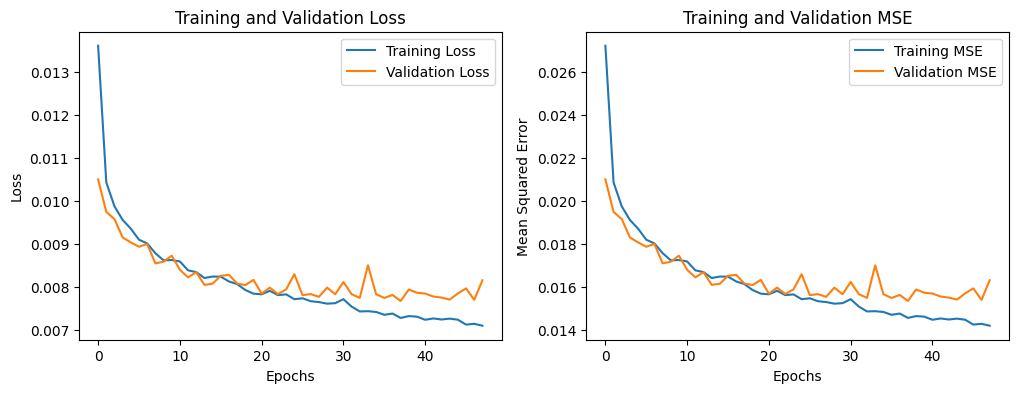

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation MSE')

plt.show()